# Eploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [4]:
data_path = "../data/BOLT Data Set.xlsx"

In [5]:
og_df = pd.read_excel(data_path)
og_df.head()

,Card Identifier,Transaction Date,Transaction Time,Risk Assessment,Payment Method,Transaction Value,Merchant Location,Card Present Status,Chip Usage,Cross-border Transaction (Yes/No),Acquiring Institution ID,Merchant Identifier,Merchant Category Code (MCC),Fraud Indicator (Yes/No)
0,card 1,2023-05-11,16:22:14.0,362.0,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812.0,No
1,card 2,2023-06-05,15:16:35.0,602.0,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No
2,card 3,2023-06-05,11:57:40.0,482.0,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211.0,No
3,card 4,2023-07-20,18:26:30.0,947.0,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814.0,No
4,card 5,2023-03-03,19:03:11.0,1382.0,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812.0,No


In [6]:
df = og_df.copy()

In [117]:
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S', errors='coerce').dt.time

In [7]:
fraud_df = df[df.fraud_indicator == "Yes"]

AttributeError: 'DataFrame' object has no attribute 'fraud_indicator'

In [8]:
df.isnull().sum()

Card Identifier                        0
Transaction Date                       0
Transaction Time                       0
Risk Assessment                      972
Payment Method                         0
Transaction Value                      0
Merchant Location                      0
Card Present Status                    0
Chip Usage                             0
Cross-border Transaction (Yes/No)      0
Acquiring Institution ID               0
Merchant Identifier                    0
Merchant Category Code (MCC)           3
Fraud Indicator (Yes/No)               0
dtype: int64

In [120]:
fraud_df.isnull().sum()

card_id                      0
transaction_date             0
transaction_time            80
risk_assessment              0
payment_method               0
transaction_value            0
merchant_location            0
card_present_status          0
chip_usage                   0
cross_border_transaction     0
acquirer_id                  0
merchant_id                  0
merchant_category_code       0
fraud_indicator              0
dtype: int64

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   card_id                   100000 non-null  object        
 1   transaction_date          100000 non-null  datetime64[ns]
 2   transaction_time          77538 non-null   object        
 3   risk_assessment           99028 non-null   float64       
 4   payment_method            100000 non-null  object        
 5   transaction_value         100000 non-null  float64       
 6   merchant_location         100000 non-null  object        
 7   card_present_status       100000 non-null  object        
 8   chip_usage                100000 non-null  object        
 9   cross_border_transaction  100000 non-null  object        
 10  acquirer_id               100000 non-null  object        
 11  merchant_id               100000 non-null  object        
 12  mer

In [126]:
df['transaction_time_hour'] = df['transaction_time'].apply(lambda x: x.hour)

In [127]:
df.head()

,card_id,transaction_date,transaction_time,risk_assessment,payment_method,transaction_value,merchant_location,card_present_status,chip_usage,cross_border_transaction,acquirer_id,merchant_id,merchant_category_code,fraud_indicator,transaction_time_hour
0,card 1,2023-05-11,16:22:14,362.0,Paypass - Contactless,13.98,USA,CP,Yes,No,acquirer 1,merchant 1,5812.0,No,16.0
1,card 2,2023-06-05,15:16:35,602.0,Online,24.64,USA,CNP,No,No,acquirer 2,merchant 2,4121.0,No,15.0
2,card 3,2023-06-05,11:57:40,482.0,Unknown,15.00,USA,CNP,No,No,acquirer 3,merchant 3,7211.0,No,11.0
3,card 4,2023-07-20,18:26:30,947.0,Online,30.56,USA,CNP,No,No,acquirer 1,merchant 4,5814.0,No,18.0
4,card 5,2023-03-03,19:03:11,1382.0,Magnetic Stripe,50.85,USA,CP,No,No,acquirer 4,merchant 1,5812.0,No,19.0


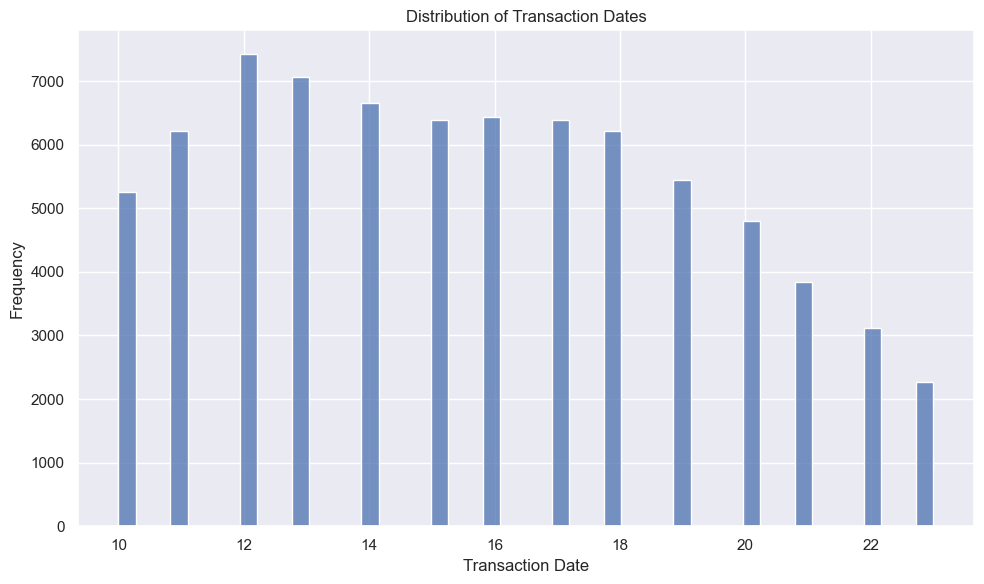

In [137]:
# Plot distribution of transaction dates
plt.figure(figsize=(10, 6))
sns.histplot(df['transaction_time_hour'])
plt.title('Distribution of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

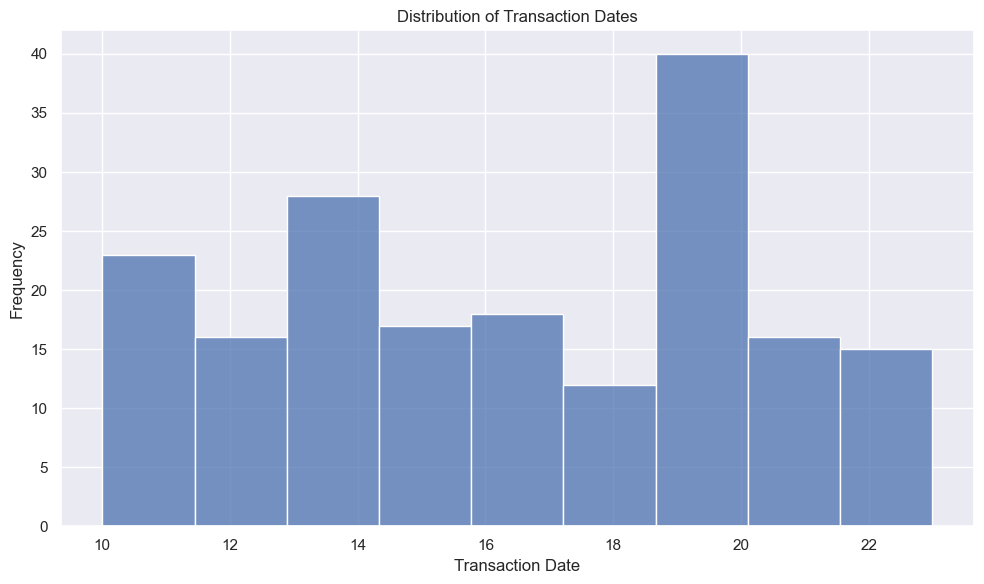

In [138]:
# Plot distribution of transaction dates
plt.figure(figsize=(10, 6))
sns.histplot(fraud_df['transaction_time_hour'])
plt.title('Distribution of Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [77]:
df['transaction_time']

0        16:22:14
1        15:16:35
2        11:57:40
3        18:26:30
4        19:03:11
           ...   
99995    13:23:04
99996    17:25:55
99997         NaN
99998    11:05:52
99999    19:41:37
Name: transaction_time, Length: 100000, dtype: object

In [10]:
df["Fraud Indicator (Yes/No)"].value_counts()

Fraud Indicator (Yes/No)
No     99735
Yes      265
Name: count, dtype: int64

In [11]:
df["Payment Method"].value_counts()

Payment Method
Online                   36695
Paypass - Contactless    21001
Chip                     17290
Subscription             11184
PayPass - Wallet          7586
Magnetic Stripe           3749
Unknown                    900
Phone                      772
Postal                     609
Mobile Wallet              114
Tap-to-Pay                  98
eCommerce                    2
Name: count, dtype: int64

In [12]:
df["Merchant Location"].value_counts()

Merchant Location
USA    85155
GBR     3573
FRA     1425
ESP     1018
NLD      775
       ...  
BHR        1
GLP        1
GUY        1
BIH        1
BLR        1
Name: count, Length: 137, dtype: int64

In [28]:
x = list(df.columns)
x.remove('Card Identifier')
x

['Transaction Date',
 'Transaction Time',
 'Risk Assessment',
 'Payment Method',
 'Transaction Value',
 'Merchant Location',
 'Card Present Status',
 'Chip Usage',
 'Cross-border Transaction (Yes/No)',
 'Acquiring Institution ID',
 'Merchant Identifier',
 'Merchant Category Code (MCC)',
 'Fraud Indicator (Yes/No)']

In [15]:
df.dtypes

Card Identifier                              object
Transaction Date                     datetime64[ns]
Transaction Time                             object
Risk Assessment                             float64
Payment Method                               object
Transaction Value                           float64
Merchant Location                            object
Card Present Status                          object
Chip Usage                                   object
Cross-border Transaction (Yes/No)            object
Acquiring Institution ID                     object
Merchant Identifier                          object
Merchant Category Code (MCC)                float64
Fraud Indicator (Yes/No)                     object
dtype: object

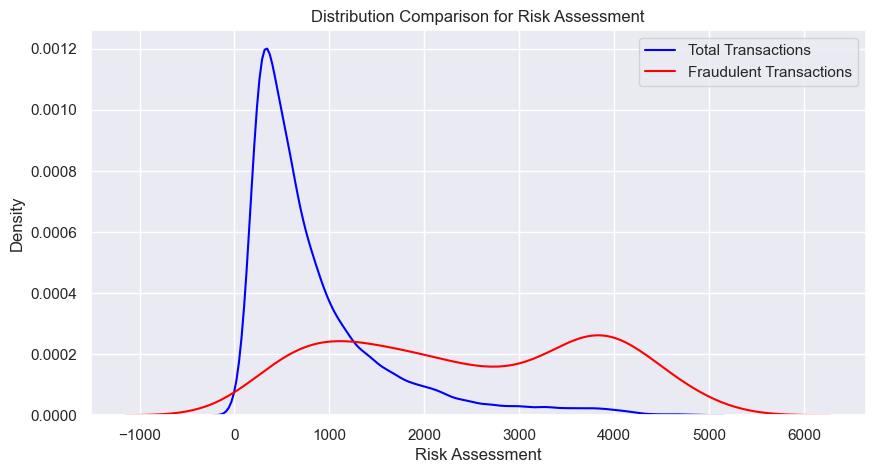

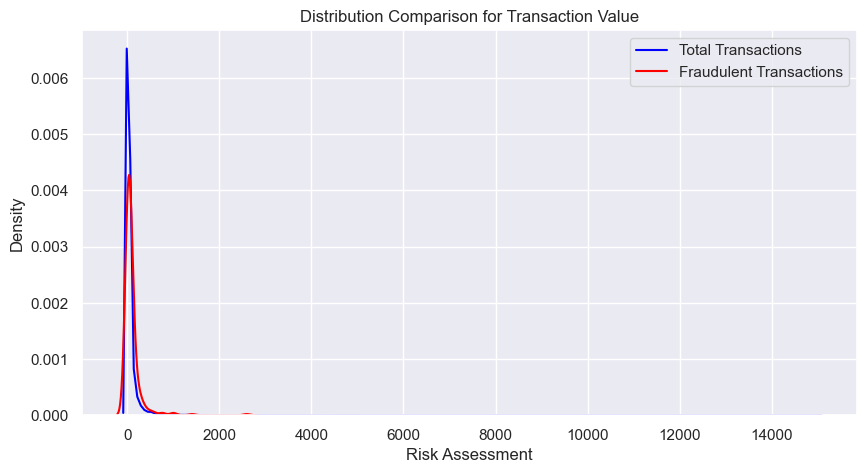

In [11]:


# Separate the data into two groups based on fraud type
fraud_yes = df[df['Fraud Indicator (Yes/No)'] == 'Yes']
total_data = df


features_to_compare = list(df.columns)
# features_to_compare.remove('Fraud Indicator (Yes/No)')
# x
# List of features you want to compare distributions for
features_to_compare = ['Risk Assessment', 'Transaction Value']  # Add more features as needed

# Plotting
for feature in features_to_compare:
    plt.figure(figsize=(10, 5))
    
    # Plot total distribution using KDE
    sns.kdeplot(total_data[feature], color='blue', label='Total Transactions')
    
    # Plot distribution for fraud type 'yes' using KDE
    sns.kdeplot(fraud_yes[feature], color='red', label='Fraudulent Transactions')
    
    plt.title(f'Distribution Comparison for {feature}')
    plt.legend()
    plt.xlabel('Risk Assessment')
    plt.ylabel('Density')
    plt.show()

In [37]:
total_data['Merchant Category Code (MCC)'].value_counts()

Merchant Category Code (MCC)
5812.0    16344
5814.0    11159
5411.0     5611
4121.0     4696
4829.0     3402
          ...  
3528.0        1
3136.0        1
7623.0        1
3099.0        1
3390.0        1
Name: count, Length: 410, dtype: int64

In [39]:
fraud_yes['Card Identifier'].value_counts()

Card Identifier
card 818     9
card 867     7
card 3242    6
card 3751    5
card 2588    5
            ..
card 4945    1
card 6868    1
card 5472    1
card 7013    1
card 5818    1
Name: count, Length: 183, dtype: int64

In [38]:
fraud_yes['Merchant Category Code (MCC)'].value_counts()

Merchant Category Code (MCC)
7311.0    19
5812.0    18
5814.0    13
5816.0    13
4899.0    11
          ..
5541.0     1
3638.0     1
5921.0     1
5462.0     1
3751.0     1
Name: count, Length: 76, dtype: int64

In [40]:
total_data.describe()

,Transaction Date,Risk Assessment,Transaction Value,Merchant Category Code (MCC)
count,100000,99028.000000,100000.000000,99997.000000
mean,2023-06-28 20:34:09.120000256,843.157905,71.130702,5807.915887
min,2023-01-01 00:00:00,2.000000,0.000000,742.000000
25%,2023-03-30 00:00:00,352.000000,6.840000,5411.000000
50%,2023-06-27 00:00:00,592.000000,19.230000,5812.000000
75%,2023-09-27 00:00:00,1052.000000,50.000000,5942.000000
max,2023-12-31 00:00:00,4932.000000,15000.000000,9999.000000
std,NaN,747.146439,296.637398,1061.918829
